<a href="https://colab.research.google.com/github/SpartansIIT/Classification_Models/blob/main/classification_inceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 41kB/s 


below code shows which GPU is alloated

In [4]:
!nvidia-smi

Thu Feb  4 01:50:31 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [6]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Spartans/Dataset/training'
valid_path = '/content/drive/MyDrive/Spartans/Dataset/testing'

In [8]:
# Import the inceptionV3 library as shown below and add preprocessing layer to the front of inceptionV3
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) # 3 becomes 1 if grayscale

87916544/87910968 [==============================] - 1s 0us/step


In [10]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [11]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Spartans/Dataset/training/*') #change the path

In [12]:
folders

['/content/drive/MyDrive/Spartans/Dataset/training/below-12',
 '/content/drive/MyDrive/Spartans/Dataset/training/above-13',
 '/content/drive/MyDrive/Spartans/Dataset/training/between-12-13']

In [13]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [15]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Spartans/Dataset/training',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 2098 images belonging to 3 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Spartans/Dataset/testing',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 245 images belonging to 3 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
132/132 [==============================] - 1290s 10s/step - loss: 2.3216 - accuracy: 0.8483 - val_loss: 6.7951 - val_accuracy: 0.8327
Epoch 2/10
132/132 [==============================] - 200s 2s/step - loss: 0.0340 - accuracy: 0.9959 - val_loss: 6.7893 - val_accuracy: 0.7184
Epoch 3/10
132/132 [==============================] - 200s 2s/step - loss: 0.0205 - accuracy: 0.9960 - val_loss: 6.1897 - val_accuracy: 0.8000
Epoch 4/10
132/132 [==============================] - 201s 2s/step - loss: 0.0178 - accuracy: 0.9967 - val_loss: 5.4851 - val_accuracy: 0.8327
Epoch 5/10
132/132 [==============================] - 201s 2s/step - loss: 0.0254 - accuracy: 0.9949 - val_loss: 4.3173 - val_accuracy: 0.7755
Epoch 6/10
132/132 [==============================] - 200s 2s/step - loss: 0.1068 - accuracy: 0.9865 - val_loss: 5.2540 - val_accuracy: 0.7959
Epoch 7/10
132/132 [==============================] - 200s 2s/step - loss: 0.0897 - accuracy: 0.9947 - val_loss: 7.1256 - val_accuracy: 0.77

In [21]:
import matplotlib.pyplot as plt

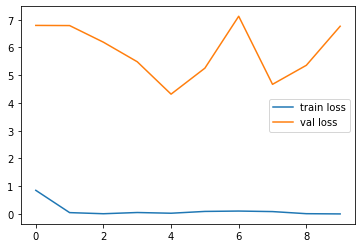

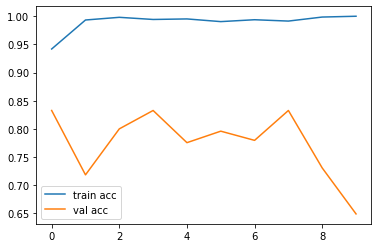

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
# save it as a h5 file


from tensorflow.keras.models import load_model
save_path = '/content/drive/MyDrive/Spartans/Dataset'

model.save('model_inception.h5')